In [1]:
#Import the required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing


In [2]:
train_data = pd.read_csv('../notebook/cleaned_data_for_regression.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

In [3]:
train_data.head()

,Unnamed: 0,amount_donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0.0,5,101,87.0,0,X,5,54,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0.0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0.0,38,92,60.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0.0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [5]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   amount_donated               19372 non-null  float64
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [8]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
train_data.head()

,amount_donated,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0.0,101,87.0,0,X,5,54,H,M,2.0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,10.0,137,79.0,0,R,2,45,H,M,7.0,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0.0,113,75.0,0,S,1,11,H,F,5.0,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0.0,92,60.0,0,U,2,4,H,F,6.0,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0.0,101,74.0,0,R,2,49,U,F,2.0,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [10]:
test_data.head()

,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,published_phone,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,101,59.0,0,R,2,46,U,F,5.0,0,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,137,59.0,0,R,2,43,U,F,5.0,1,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,17,30.0,0,T,1,35,H,M,6.0,1,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,137,75.0,0,U,1,2,H,M,6.0,1,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,5,59.0,0,T,2,40,U,F,2.0,0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [11]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

In [12]:
train_data = train_data[train_data.amount_donated != 0.00]

In [13]:
train_data.shape

(4843, 48)

In [14]:
# Selecting the independent variables and the target variable
#
y = train_data['amount_donated']
X = train_data.drop('amount_donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [15]:
total_data = pd.concat([X, test_data])

In [16]:
train_data.shape, test_data.shape

((4843, 48), (2148, 47))

In [17]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [18]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(categorical_columns):
        total_data[i]=le.fit_transform(total_data[i])

* **Splitting the Train and Test data to after encoding the categorical columns**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(total_data)
train_d2 = pd.DataFrame(train_d1,columns=total_data.columns)
total_data = train_d2

In [20]:
X_train_cat_encoded =  total_data.iloc[:4843]
X_test_cat_encoded =  total_data.iloc[4843:]
X_train_cat_encoded.shape, X_test_cat_encoded.shape

((4843, 57), (2148, 57))

In [21]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
0,1.000000,0.903614,0.0,0.25,0.830189,1.000000,0.0,0.0,0.333333,0.055834,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.636364,0.903614,0.0,0.25,0.509434,0.000000,0.0,0.0,0.555556,0.167837,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.727273,0.710843,0.0,0.25,0.792453,0.500000,1.0,0.0,0.555556,0.066700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.674699,0.0,0.25,0.792453,0.666667,1.0,0.0,0.111111,0.079405,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.545455,0.927711,0.0,0.25,0.830189,0.500000,1.0,0.1,0.333333,0.088599,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import warnings
warnings.filterwarnings("ignore")



import random
random.seed(1234)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y, test_size = 0.30, random_state=0)

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# # Create linear regression object
clf = linear_model.LinearRegression() 
reg = clf.fit(X_train, y_train)

print('linear model intercept: {}'
     .format(reg.intercept_))

print('linear model coeff:\n {}'
      .format(reg.coef_))

# #train score
scores =  cross_val_score(clf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score

pred_reg = reg.predict(X_test)
scores = cross_val_score(reg, y_test,pred_reg,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, reg.predict(X_test)))

linear model intercept: 6.289807168888585
linear model coeff:
 [ 2.10700487e+00  5.87260340e-01 -1.26510964e+00  4.07873415e+00
 -7.74210827e+00  4.99774564e-01  8.09505744e-02 -7.58869916e+00
 -2.51514755e-01 -1.64594716e+00  6.14871570e+00 -2.42266749e+00
  5.84425783e+00  7.57582062e-01  4.25029055e+00 -3.62073700e-01
 -3.42453113e-01 -1.09820798e+00 -6.93297982e-01 -2.65541086e+00
  5.98591478e-01  1.11119195e+02 -1.18506805e+00  2.34172618e+00
 -5.64051827e-01 -3.43193717e-01 -2.90197846e+00 -2.04619548e+00
 -1.01548088e+00  2.34334682e+01 -1.05373036e+01  1.23380613e+01
  1.50692494e+01 -2.88267183e+01 -9.71258364e+01  1.16436702e+02
  3.60813430e+00  5.18443725e+00  3.33339696e+00 -1.06765325e+01
  1.23380613e+01  5.56382061e+00  3.32461881e+00 -9.56513845e-01
  2.27198334e+00 -2.44089633e+00  4.84047223e+00  1.35853743e+00
  6.68479856e-01 -1.01613725e-01 -1.17492920e+00  2.12020556e-01
  1.92691637e+00 -1.02778300e-01  2.59646569e+00 -1.34895856e-01
  4.25720857e-01]
R-squared

In [23]:
import statsmodels.api as sm

In [29]:
y = list(y)

In [30]:
model = sm.OLS(y, X_train_cat_encoded).fit()
predictions = model.predict(X_train_cat_encoded)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                -17055.
No. Observations:                4843   AIC:                         3.422e+04
Df Residuals:                    4787   BIC:                         3.459e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
months_since_origin             2.6908      2.366      1.137      0.255      -1.947       7.329
donor_age                       0.5846      0.751      0.779      0.436      -0.887       2.057
in_house                       -0.9765      0.567     -1.722      0.085      -2.088       0.135
ses                             3.3743      1.567      2.154      0.031       0.303       6.446
cluster_code                   -5.6931      4.386     -1.298      0.194     -14.292       2.906
income_group                    0.4773      0.497      0.960      0.337      -0.497       1.452
published_phone                 0.3889      0.281      1.384      0.166      -0.162       0.940
mor_hit_rate                   -2.2908      3.204     -0.715      0.475      -8.572       3.991
wealth_rating                   1.0757      0.617      1.744      0.081      -0.133       2.285
median_home_value              -1.1575      1.184     -0.978      0.328      -3.479       1.164
median_household_income         3.9277      2.620      1.499      0.134      -1.208       9.064
pct_owner_occupied             -1.5748      0.788     -1.998      0.046      -3.120      -0.030
per_capita_income               1.7155      4.519      0.380      0.704      -7.145      10.576
pct_attribute1                  0.1693      2.567      0.066      0.947      -4.862       5.201
pct_attribute2                  2.8397      1.068      2.658      0.008       0.745       4.934
pct_attribute3                  0.6759      1.019      0.663      0.507      -1.322       2.674
pct_attribute4                 -0.2717      0.939     -0.289      0.772      -2.112       1.569
pep_star                       -0.7470      0.344     -2.169      0.030      -1.422      -0.072
recent_star_status             -1.9811      1.277     -1.551      0.121      -4.484       0.522
frequency_status_97nk          -2.7192      0.557     -4.885      0.000      -3.810      -1.628
recent_response_prop            0.6691      3.634      0.184      0.854      -6.456       7.794
recent_avg_gift_amt           103.7967      5.218     19.891      0.000      93.566     114.027
recent_card_response_prop      -3.6276      2.217     -1.637      0.102      -7.973       0.718
recent_avg_card_gift_amt       12.4905      3.656      3.416      0.001       5.322      19.659
recent_response_count          -2.2224      3.885     -0.572      0.567      -9.840       5.395
recent_card_response_count      2.2773      2.666      0.854      0.393      -2.949       7.503
months_since_last_prom_resp    -4.5237      2.422     -1.868      0.062      -9.272       0.224
lifetime_card_prom             -2.4562      4.158     -0.591      0.555     -10.607       5.695
lifetime_prom                  -1.8970      5.180     -0.366      0.714     -12.052       8.258
lifetime_gi

In [32]:
# Features and their respective coefficients
coeffs_df = pd.DataFrame(list(zip(X_train_cat_encoded.columns, clf.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
35,last_gift_amt,116.436702
21,recent_avg_gift_amt,111.119195
29,lifetime_gift_amount,23.433468
32,lifetime_gift_range,15.069249
40,file_avg_gift,12.338061
31,lifetime_avg_gift_amt,12.338061
10,median_household_income,6.148716
12,per_capita_income,5.844258
41,file_card_gift,5.563821
37,number_prom_12,5.184437


In [33]:
pos_coeffs_df= coeffs_df[(coeffs_df['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_df

,Features,Estimated_Coefficients
35,last_gift_amt,116.436702
21,recent_avg_gift_amt,111.119195
29,lifetime_gift_amount,23.433468
32,lifetime_gift_range,15.069249
40,file_avg_gift,12.338061
31,lifetime_avg_gift_amt,12.338061
10,median_household_income,6.148716
12,per_capita_income,5.844258
41,file_card_gift,5.563821
37,number_prom_12,5.184437


In [34]:
neg_coeffs_df = coeffs_df[(coeffs_df['Estimated_Coefficients'] < 0)].sort_values(by='Estimated_Coefficients', ascending = True)
neg_coeffs_df

,Features,Estimated_Coefficients
34,lifetime_min_gift_amt,-97.125836
33,lifetime_max_gift_amt,-28.826718
39,months_since_first_gift,-10.676532
30,lifetime_gift_count,-10.537304
4,cluster_code,-7.742108
7,mor_hit_rate,-7.588699
26,months_since_last_prom_resp,-2.901978
19,frequency_status_97nk,-2.655411
45,urbanicity_U,-2.440896
11,pct_owner_occupied,-2.422667


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

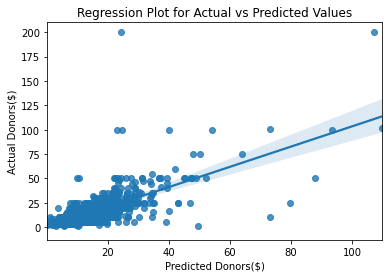

In [36]:
g = sns.regplot(x=clf.predict(X_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted Donors($)', ylabel='Actual Donors($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

In [37]:
random.seed(1234)

# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
k_range = np.array([1,2,3,4,5,6,7,8,9,10])

knn = KNeighborsRegressor(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid=dict(n_neighbors=k_range), cv= 5)
grid.fit(X_train_cat_encoded, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_:",grid.best_estimator_.n_neighbors)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(knn,y_test,knn_pred,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, knn.predict(X_test)))

grid: GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})
grid.best_score_: 0.10443217542018386
grid.best_estimator_: 10
R-squared score for training 0.11570192418269079
R-squared score for testing nan
Mean Square error 155.39662503441156


In [38]:
random.seed(1234)

# Grid Search for Algorithm Tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
ridge_model = Ridge()
grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alphas), cv=5)

grid.fit(X_train_cat_encoded, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

print('**********************------------------------------****************************')

#  Model for best alpha

model = Ridge(alpha=100)
ridge = model.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


print('ridge regression linear model intercept: {}'
     .format(ridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(ridge.coef_))

# #train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(ridge,y_test,ridge_pred,cv=5)
print("R-squared score for testing", scores.mean())

print('Number of non-zero features: {}'
     .format(np.sum(ridge.coef_ != 0)))
#MSE
print ("Mean Square error", mean_squared_error(y_test, ridge.predict(X_test)))

grid: GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
grid.best_score_: 0.49261525558462776
grid.best_estimator_.alpha: 1.0
**********************------------------------------****************************
ridge regression linear model intercept: 15.324705813941318
ridge regression linear model coeff:
[-2.38373110e+00 -2.24601470e-01  1.07791259e+00  8.44343217e-01
  5.12443824e-01  1.65730591e+00 -1.33177444e-02 -2.92336890e-01
  1.11560199e+00  2.06282725e+00  1.39205073e+00 -6.73004093e-01
  1.08624246e+00  8.28942677e-02  2.90842907e-01  4.69964042e-03
  9.28014788e-02 -1.71025667e+00  1.01718604e+00 -6.19136949e+00
 -1.55725648e+00  9.55189875e+00 -2.01134443e+00  6.30986795e+00
 -1.48830191e+00 -7.25363045e-01  3.20565102e-01  8.29570068e-01
  1.42782335e+00  5.19424936e+00 -1.39627535e+00  3.14729310e+00
  1.94092269e+00  2.52513139e+00  1.28312401e+00  5.19996147e+00
  1.81936613e+0

In [39]:
random.seed(1234)

# Grid Search for parameter Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1000,100,10,1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
Lasso_model = Lasso()
grid = GridSearchCV(estimator=Lasso_model, param_grid=dict(alpha=alphas), cv=5)

grid.fit(X_train_cat_encoded, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

print('***********************************************************************')

# Model
model = Lasso(alpha=0.0001,max_iter = 100000)
lasso = model.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print('lasso regression linear model intercept: {}'
     .format(lasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso.coef_ != 0)))

# #train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(lasso,y_test,lasso_pred,cv=5)
print("R-squared score for testing", scores.mean())

print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
        
#MSE
print ("Mean Square error", mean_squared_error(y_test, lasso.predict(X_test)))

grid: GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       0.e+00])})
grid.best_score_: 0.4918312843184145
grid.best_estimator_.alpha: 0.01
***********************************************************************
lasso regression linear model intercept: 6.21233264518138
lasso regression linear model coeff:
[ 1.98901281e+00  5.79661565e-01 -1.26617127e+00  3.95460346e+00
 -7.34451650e+00  5.01982178e-01  8.12188760e-02 -7.50904006e+00
 -2.45603535e-01 -1.61312944e+00  6.08846735e+00 -2.41504497e+00
  5.77813641e+00  7.16256621e-01  4.23414953e+00 -3.50751240e-01
 -3.32713887e-01 -1.09680749e+00 -6.64616474e-01 -2.64648852e+00
  5.09617362e-01  1.11472370e+02 -1.15118839e+00  2.39659191e+00
 -4.94504417e-01 -3.39848607e-01 -2.83947966e+00 -1.97276534e+00
 -9.26817465e-01  2.34777817e+01 -1.05217977e+01  1.93705016e+01
 -0.00000000e+00 -1.29318486e+01 -9.99669869e+01  1.16977225e+02
  3.5285392

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

df_X = X_train_cat_encoded
df_y = y

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, df_y, random_state=0)

linreg = LinearRegression().fit(X_train_p, y_train_p)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2) linear model coeff (w):
[ 1.82570730e-07  4.71582135e+09  1.80085377e+08 ... -7.21937697e+11
  0.00000000e+00  5.11872427e+12]
(poly deg 2) R-squared score (training): 0.803
(poly deg 2) R-squared score (test): -3514409452239080960.000



In [41]:
linreg = Ridge().fit(X_train_p, y_train_p)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          0.59935098 -1.02686739 ... -3.52782098  0.
 -0.59740124]
(poly deg 2 + ridge) R-squared score (training): 0.677
(poly deg 2 + ridge) R-squared score (test): 0.557


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilons = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilons}
grid_search = GridSearchCV(svm.SVR(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train_cat_encoded, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10, 'epsilon': 0.01, 'gamma': 0.001}


In [43]:
#linear SVM model
clf_lin = SVR(kernel='linear',C = 10, epsilon = 0.01, gamma = 0.001)
svm_lin = clf_lin.fit(X_train, y_train)
svm_pred = svm_lin.predict(X_test)

# train score
scores =  cross_val_score(clf_lin, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())
#test score
scores = cross_val_score(svm_lin,y_test,svm_pred,cv=5)
print("R-squared score for testing", scores.mean())
#MSE
print ("Mean Square error", mean_squared_error(y_test, svm_lin.predict(X_test)))

R-squared score for training 0.5208174160027917
R-squared score for testing nan
Mean Square error 85.34633164069113


In [45]:
#Hyper parameter tuning for kernelized SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1, 10]
epsilons = [0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilons}
grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_cat_encoded, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


In [ ]:
#kernelized SVM model
clf_rbf = SVR(kernel='rbf',C = 10, epsilon = 0.01, gamma = 0.1 )

svm_rbf = clf_rbf.fit(X_train, y_train)
svm_pred = svm_rbf.predict(X_test)

# train score
scores =  cross_val_score(clf_rbf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())
#test score
scores = cross_val_score(svm_rbf,y_test,svm_pred,cv=5)
print("R-squared score for testing", scores.mean())
#MSE
print ("Mean Square error", mean_squared_error(y_test, svm_rbf.predict(X_test)))